We'll be working with the fandango_scores.csv file, which can be downloaded from the FiveThirtEight Github repo. Here are the columns we'll be working with in this mission:

FILM - film name
RT_user_norm - average user rating from Rotten Tomatoes, normalized to a 1 to 5 point scale
Metacritic_user_nom - average user rating from Metacritic, normalized to a 1 to 5 point scale
IMDB_norm - average user rating from IMDB, normalized to a 1 to 5 point scale
Fandango_Ratingvalue - average user rating from Fandango, normalized to a 1 to 5 point scale
Fandango_Stars - the rating displayed on the Fandango website (rounded to nearest star, 1 to 5 point scale)
Instead of displaying the raw rating, the writer discovered that Fandango usually rounded the average rating to the next highest half star (next highest 0.5 value). The Fandango_Ratingvalue column reflects the true average rating while the Fandango_Stars column reflects the displayed, rounded rating.

Let's read in this dataset, which allows us to compare how a movie fared across all 4 review sites.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

reviews = pd.read_csv(r'C:\Users\CLEMO\\UserReviews\fandango_scores.csv')
reviews.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
norm_reviews = reviews[['FILM','RT_user_norm','Metacritic_user_nom','IMDB_norm','Fandango_Ratingvalue','Fandango_Stars']]
                     
print(norm_reviews[:1])

                             FILM  RT_user_norm  Metacritic_user_nom  \
0  Avengers: Age of Ultron (2015)           4.3                 3.55   

   IMDB_norm  Fandango_Ratingvalue  Fandango_Stars  
0        3.9                   4.5             5.0  


Next we will generate bar plots in order to create context on which is movie has the highest user reviews.


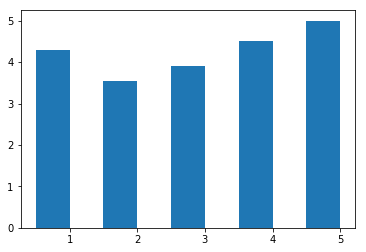

In [4]:
from numpy import arange
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_heights = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75

fig, ax = plt.subplots()

ax.bar(bar_positions, bar_heights, 0.5)

plt.show()

By default, matplotlib sets the x-axis tick labels to the integer values the bars spanned on the x-axis (from 0 to 6). We only need tick labels on the x-axis where the bars are positioned. We can use Axes.set_xticks() to change the positions of the ticks to [1, 2, 3, 4, 5]:

We will create a single subplot and assign the returned Figure object to fig and the returned Axes object to ax.

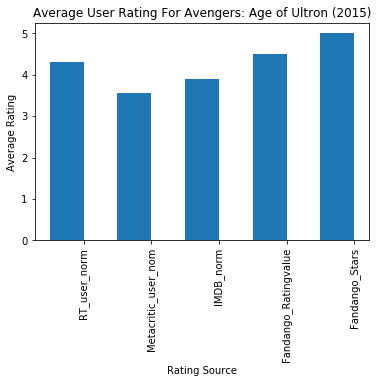

In [6]:
#We will create a single subplot and assign the returned Figure object to fig and the returned Axes object to ax.
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_heights = norm_reviews[num_cols].iloc[0].values

bar_positions = arange(5) + 0.75

tick_positions = range(1,6)
#We will create a single subplot and assign the returned Figure object to fig and the returned Axes object to ax
fig, ax = plt.subplots()
#Generate a bar plot with left set to bar_positions height set to bar_heights width set to 0.5.
ax.bar(bar_positions, bar_heights, 0.5)

ax.set_xticks(tick_positions)

ax.set_xticklabels(num_cols, rotation=90)
ax.set_title("Average User Rating For Avengers: Age of Ultron (2015)")
ax.set_xlabel("Rating Source")
ax.set_ylabel("Average Rating")


plt.show()
